## Entity detection - Frame

In [140]:
#%load_ext autoreload
#%autoreload 2
#
#from frames import get_frame
#from google_detect import ObjectDetector
#from config import Config
#
#frame = get_frame(minute=Config.minute, second=Config.second)
#
#first =  ObjectDetector()
#result = first.detect_and_visualize(image_path=Config.image_path, 
#                          text_queries=Config.texts,
#                           threshold=0.3)

# Entity Tracking

In [141]:
#%load_ext autoreload
#%autoreload 2
#
#from tracking import VideoTracker
#from clip import extract_clip_and_frame
#from config import Config
#import os
#
#clip_path, _ = extract_clip_and_frame(video_path=Config.video_path,
#                             event_minute=Config.minute,
#                             event_second=Config.second)
#                             
#
#tracker = VideoTracker()
#
#output_video_path = os.path.join(Config.output_clip_dir, "tracked_" + Config.output_name)
#
#tracking_results = tracker.process_video(
#    clip_path, 
#    output_video_path,
#)
#
#total_tracks = sum(len(frame_data['tracks']) for frame_data in tracking_results)
#avg_tracks_per_frame = total_tracks / len(tracking_results) if tracking_results else 0
#
#print(f"- Promedio de tracks por frame: {avg_tracks_per_frame:.1f}")
#print(f"- Total de detecciones: {total_tracks}")

# Draw Bounding Boxes

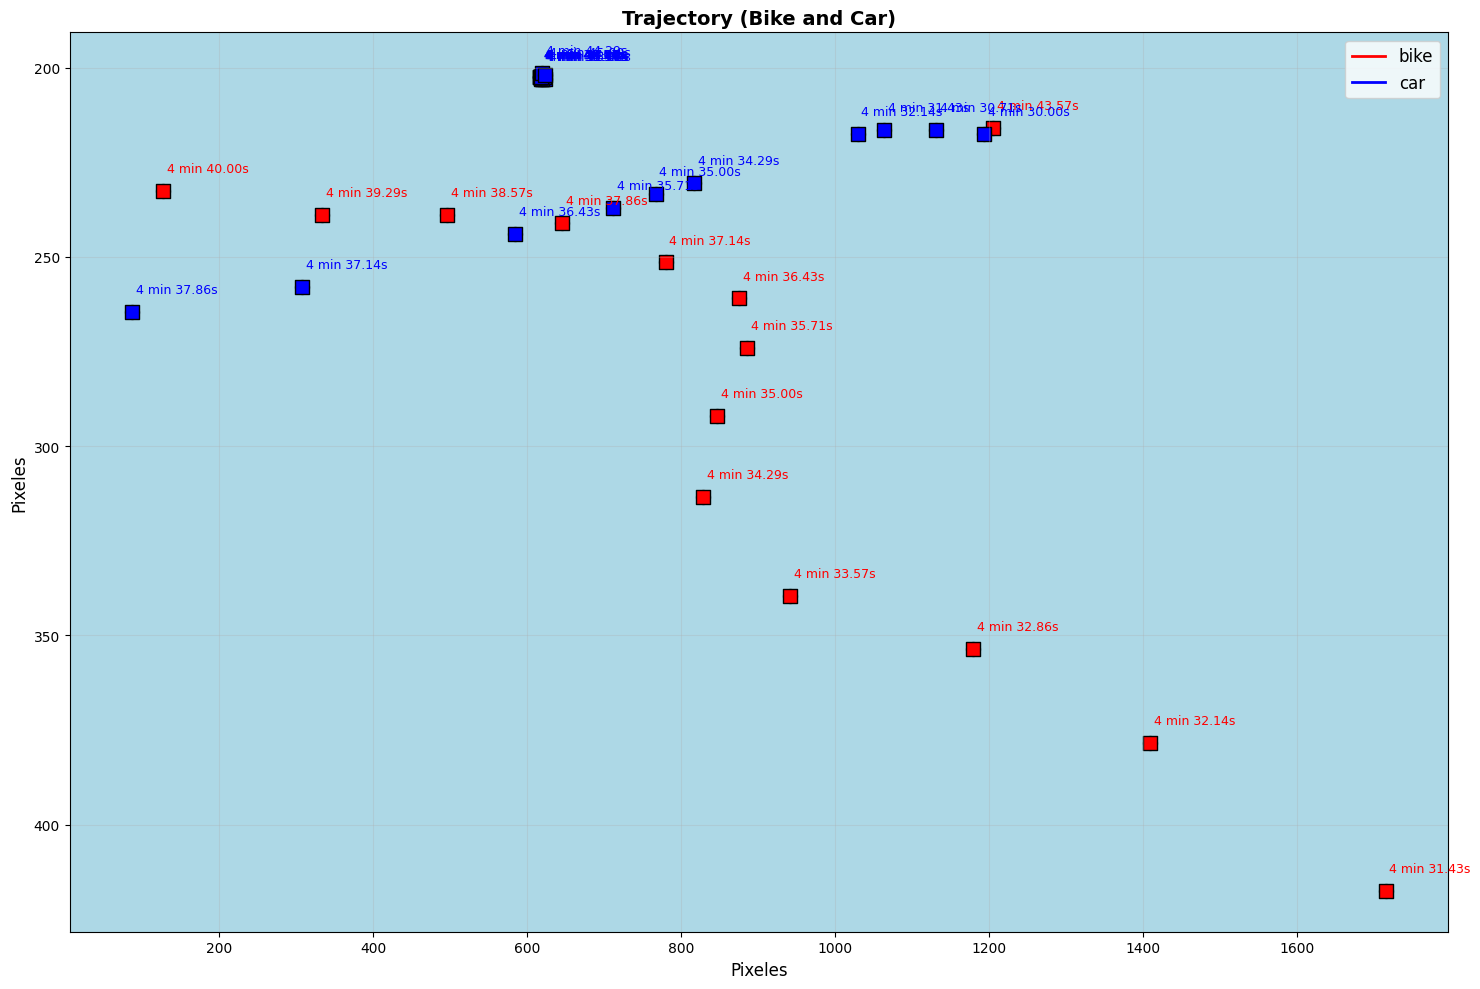

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from config import Config

bike_csv = "./clips/dataset/bounding_boxes_dataset_bike.csv"
car_csv = "./clips/dataset/bounding_boxes_dataset_car.csv"

df_bike = pd.read_csv(bike_csv)
df_bike["object_type"] = "bike"

df_car = pd.read_csv(car_csv)
df_car["object_type"] = "car"

#y_threshold = 220
#df_car_filtered = df_car[df_car["center_y"] > y_threshold]

df_all = pd.concat([df_bike, df_car], ignore_index=True)

class TrajectoryVisualizer:
    def __init__(self, df):
        self.df = df
        
    def plot_trajectories(self, figsize=(15, 10), background_color='white', show_boxes=False, show_time=True):
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_facecolor(background_color)

        object_types = self.df["object_type"].unique()
        colors = {"bike": "red", "car": "blue"}

        for obj in object_types:
            df_obj = self.df[self.df["object_type"] == obj]
            for track_id in df_obj["track_id"].unique():
                track_data = df_obj[df_obj["track_id"] == track_id].sort_values("frame_number")

                centers_x = track_data["center_x"].values
                centers_y = track_data["center_y"].values
                timestamps = track_data["timestamp_sec"].values

                ax.plot(centers_x, centers_y, color=colors[obj], linewidth=2, alpha=0.7)
                ax.scatter(centers_x[0], centers_y[0], color=colors[obj], s=100, marker="o", edgecolors="black")
                ax.scatter(centers_x[-1], centers_y[-1], color=colors[obj], s=100, marker="s", edgecolors="black")

                if show_boxes:
                    for _, row in track_data.iterrows():
                        rect = Rectangle((row["x1"], row["y1"]),
                                         row["x2"] - row["x1"],
                                         row["y2"] - row["y1"],
                                         linewidth=1, 
                                         edgecolor=colors[obj],
                                         facecolor="none", alpha=0.3)
                        ax.add_patch(rect)

                if show_time:
                    for x, y, t in zip(centers_x, centers_y, timestamps):
                        ax.text(x + 5, y - 5, f"{Config.minute} min {Config.second + 4 + t:.2f}s", fontsize=9, color=colors[obj])

        ax.set_xlabel("Pixeles", fontsize=12)
        ax.set_ylabel("Pixeles", fontsize=12)
        ax.set_title("Trajectory (Bike and Car)", fontsize=14, fontweight="bold")

        ax.invert_yaxis()
        ax.grid(True, alpha=0.3)

        handles = [plt.Line2D([0], [0], color=colors[obj], lw=2) for obj in object_types]
        labels = [obj for obj in object_types]
        ax.legend(handles, labels, loc="upper right", fontsize=12, framealpha=0.8)

        plt.tight_layout()
        return fig, ax

visualizer = TrajectoryVisualizer(df_all)
fig, ax = visualizer.plot_trajectories(figsize=(15, 10), background_color="lightblue")
plt.show()


In [143]:
df_bike

,frame_number,track_id,x1,y1,x2,y2,width,height,confidence_score,center_x,...,area,entity_type,color,video_width,video_height,fps,timestamp_video,timestamp_sec,timestamp_hms,object_type
0,20,1674e170-a812-4ebb-8b43-afc152ab2585,1528,324,1903,511,375,187,0.541820,1715.5,...,70125,Man in a bike,"(0, 0, 255)",1920,1080,14,271.428571,1.428571,0 days 00:00:01.428571429,bike
1,30,4b1917a8-9252-4e04-8b99-e077e38d69a1,1260,303,1560,454,300,151,0.574177,1410.0,...,45300,Man in a bike,"(0, 0, 255)",1920,1080,14,272.142857,2.142857,0 days 00:00:02.142857143,bike
2,40,93deae2c-cc67-4068-8baa-b014d6c63562,1062,286,1298,421,236,135,0.551147,1180.0,...,31860,Man in a bike,"(0, 0, 255)",1920,1080,14,272.857143,2.857143,0 days 00:00:02.857142857,bike
3,50,bd04e242-7573-4073-820f-ae1fe86c9e4e,883,282,1001,397,118,115,0.444706,942.0,...,13570,Man in a bike,"(0, 0, 255)",1920,1080,14,273.571429,3.571429,0 days 00:00:03.571428571,bike
4,60,a6f35d0a-c5dc-4b28-9491-50e7dc12c2b4,791,259,867,368,76,109,0.521897,829.0,...,8284,Man in a bike,"(0, 0, 255)",1920,1080,14,274.285714,4.285714,0 days 00:00:04.285714286,bike
5,70,cb467f9f-56eb-4289-9eed-ad2ce1fa9357,818,254,875,330,57,76,0.447671,846.5,...,4332,Man in a bike,"(0, 0, 255)",1920,1080,14,275.000000,5.000000,0 days 00:00:05,bike
6,80,889e7b00-5a86-4c9b-b768-4669acde9f8d,863,237,908,311,45,74,0.485109,885.5,...,3330,Man in a bike,"(0, 0, 255)",1920,1080,14,275.714286,5.714286,0 days 00:00:05.714285714,bike
7,90,41abfa7d-a269-4a99-92c9-25f22a005353,850,228,900,294,50,66,0.540261,875.0,...,3300,Man in a bike,"(0, 0, 255)",1920,1080,14,276.428571,6.428571,0 days 00:00:06.428571429,bike
8,100,f72f0a00-2bef-4f7d-afa8-1112a6d25ec8,731,225,829,278,98,53,0.425651,780.0,...,5194,Man in a bike,"(0, 0, 255)",1920,1080,14,277.142857,7.142857,0 days 00:00:07.142857143,bike
9,110,1c61df5b-d8d3-4db3-8f75-9abdc6cab9f3,584,210,706,272,122,62,0.471179,645.0,...,7564,Man in a bike,"(0, 0, 255)",1920,1080,14,277.857143,7.857143,0 days 00:00:07.857142857,bike


In [144]:
df_bike.loc[:, 'track_id'] = df_bike['track_id'].iloc[0]
df_bike["timestamp_video"] = df_bike["timestamp_video"].round(3)
df_car.loc[:, 'track_id'] = df_car['track_id'].iloc[0]
df_car["timestamp_video"] = df_car["timestamp_video"].round(3)
df_bike = df_bike.iloc[:-1]

df_bike2 = df_bike.drop(columns=["center_x", "center_y", "object_type", "width", "height", "video_width", "video_height", "timestamp_sec", "timestamp_hms"])
df_car2 = df_car.drop(columns=["center_x", "center_y", "object_type", "width", "height", "video_width", "video_height", "timestamp_sec", "timestamp_hms"])

In [145]:
df_bike2.to_json('tracking_bike.json', orient='records')
df_car2.to_json('tracking_suv.json', orient='records')